In [40]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import time
import statistics

## Variable Global

In [41]:
matrizDistancias = []
tiempo = 0

## Funciones Auxiliares Comunes

In [42]:
# Dado un String, Lee el archivo correspondiente
def leeArchivo(archivo):
    f = open("Ejecuciones/tsp/" + archivo)
    x = []
    y = []
    cont = 0;
    for linea in f:
        cont += 1
        sp = linea.split(" ")
        if cont > 6 and sp[0] != "EOF\n":
            i = -2
            xp = sp[i]
            while xp == "":
                i -= 1
                xp = sp[i]
            yp = sp[-1].split("\n")
            x.append(float(xp))
            y.append(float(yp[0]))  
    return x,y

In [43]:
# Calcula la distancia entre dos puntos (x,y) - (x2,y2)
def calculaDistancia(x, y, x2, y2):
    xd = x - x2
    yd = y - y2
    return round(math.sqrt(xd*xd + yd*yd))

In [44]:
# Pinta todos los puntos recibiendo una lista de puntos x e y
def pintaMapa(x,y):
    plt.figure(figsize=(15, 8))
    plt.scatter(x,y)
    plt.show()

In [45]:
# Dado un vector de resultado, pinta el resultado de este vector sobre los puntos
def pintaCamino(v,x,y,coste):
    plt.figure(figsize=(15, 8))
    xc = []
    yc = []
    for i in v:
            xc.append(x[i])
            yc.append(y[i])
    
    xc.append(x[v[0]])
    yc.append(y[v[0]])
    
    plt.plot(xc,yc,"y")
    plt.scatter(x,y, c = "black")
    plt.scatter(xc[0],yc[0],c="green")
    plt.scatter(xc[-2],yc[-2],c="red")
    
    plt.suptitle("Mejor camino con coste " + str(coste),fontsize=20)
    
    plt.show()    

In [46]:
# Calcula matriz de distancias
def calculaMatrizDistancias(x,y):
    global matrizDistancias 
    matrizDistancias = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            matrizDistancias[i,j] = calculaDistancia(x[i],y[i],x[j],y[j])

In [47]:
# Calcula Coste del vector Solucion
def calculaCoste(vResultado):
    kms = 0;
    for i in range(1,len(vResultado)):
            kms += matrizDistancias[vResultado[i-1]][vResultado[i]]
    kms += matrizDistancias[vResultado[-1]][vResultado[0]]
    return kms

In [48]:
# Calcula Coste Vecino
def calculaCosteVecino(costeSolAntigua, sAntigua, sActual, i1, i2):
    if i1 + 1 > len(sActual) - 1:
        piv1 = 0
    else:
        piv1 = i1 + 1
    
    if i2 + 1 > len(sActual) - 1:
        piv = 0
    else:
        piv = i2 + 1
    
    
    coste = costeSolAntigua - matrizDistancias[sAntigua[i1 - 1]][sAntigua[i1]] - matrizDistancias[sAntigua[ piv1]][sAntigua[i1]]
    coste = coste - matrizDistancias[sAntigua[i2 - 1]][sAntigua[i2]] - matrizDistancias[sAntigua[piv]][sAntigua[i2]]
    coste = coste + matrizDistancias[sActual[i1 - 1]][sActual[i1]] + matrizDistancias[sActual[ piv1]][sActual[i1]]
    coste = coste + matrizDistancias[sActual[i2 - 1]][sActual[i2]] + matrizDistancias[sActual[piv]][sActual[i2]]
    return coste

In [49]:
# Genera solucion aleatoria
def solucionAleatoria(tam):
    vResult = list(range(0,tam))
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [50]:
# Tic
def tic():
    global tiempo 
    tiempo = time.time()

In [51]:
# Toc
def toc():
    global tiempo 
    return  (time.time() - tiempo)

In [52]:
def representaResultados(analisisResultado):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste Minimo", "Numero Evaluaciones" , "Tiempo"])
    for i in range(0,5):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
    
    #tablaFinal.to_excel(nombre + ".xlsx")  
    
    display(tablaFinal)
    print("Media coste: ", tablaFinal[["Coste Minimo"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste Minimo"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Desviación típica de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].std()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])

# Fichero a Analizar

In [53]:
x, y = leeArchivo("st70.tsp")
#x, y = leeArchivo("ch130.tsp")
#x, y = leeArchivo("a280.tsp")
calculaMatrizDistancias(x,y)

# Algoritmo Greedy Estandar

In [54]:
# Algoritmo Greedy
def greedy(x,y,mostrar):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))
    i = 0;
    vResultado.append(nodosNoVisitados[i])
    del nodosNoVisitados[i]
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        k = 0
        encontrado = False
        
        while k < len(y) and encontrado == False:      
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    encontrado = True
        vResultado.append(minimo[0][z])
        nodosNoVisitados.remove(minimo[0][z])
        i += 1
    km = calculaCoste(vResultado)
    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.003988981246948242


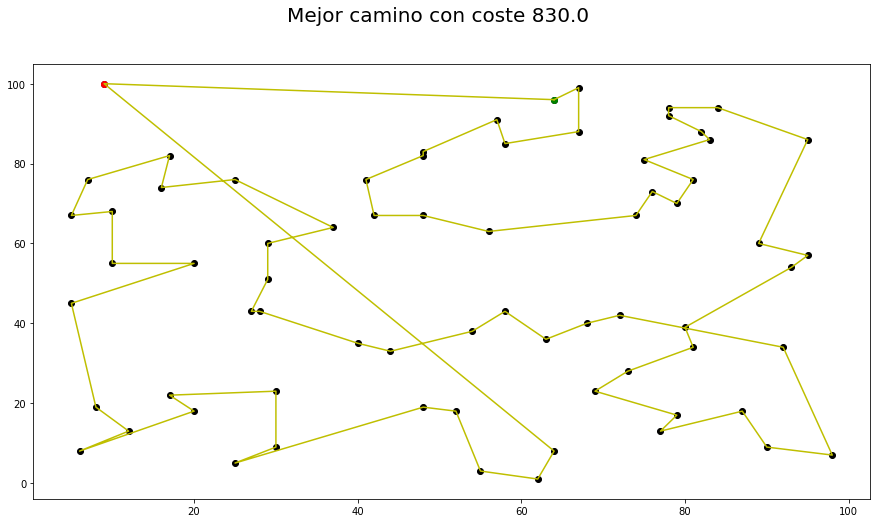

In [55]:
# Greedy
resultado, km = greedy(x, y,"s")

# Algorimos basados en Colonias de Hormigas

In [56]:
def inicializaTabla(feromonaInicial, resultado):
    t = np.zeros((tam,tam))

    for i in range(0,len(resultado)):
        if (i + 1) == len(resultado):
            j = 0
        else:
            j = i + 1

        t[resultado[i], resultado[j]] = feromonaInicial
        t[resultado[j], resultado[i]] = feromonaInicial
    
    return t

In [57]:
def actualizaTabla(t, aporte, L):
    for i in range(0,len(L)):
        if (i + 1) == len(L):
            j = 0
        else:
            j = i + 1

        t[L[i], L[j]] += aporte
        t[L[j], L[i]] += aporte
    
    return t

## SH

In [58]:
def algoritmoSH( tam, numSemillas, numHormigas, maxTime, alpha, beta, p, t):
    analisisResultado = []
    mejorCam = []
    bestCost = float("inf")
    for z in range(0, numSemillas):
        resultadoIntermedio = []
        semilla = 50 * z
        random.seed(semilla)
        cMedia = []
        cMejor = []
        numEva = 0
        
        costeGlobal = float("inf")
        mejorHormiga = []

        tic()
        time = 0
        while time < maxTime:

            L = np.zeros((numHormigas, tam))

            # Nodo inicial aleatorio de cada hormiga
            for hormiga in range(0,numHormigas):   
                nodoInicial = random.randint(0,tam-1)
                L[hormiga, 0] = nodoInicial   

            # Solución de cada hormiga
            for hormigaActual in range(0,numHormigas):
                visitados = []
                visitados.append(L[hormigaActual, 0])
                noVisitados = list(range(0,tam))
                noVisitados.remove(L[hormigaActual, 0])
                while len(noVisitados) != 0:
                    nodoActual = int(visitados[-1])
                    costes = []
                    for i in noVisitados:
                        distancia = matrizDistancias[nodoActual, i]
                        feromona = t[nodoActual, i]
                        if feromona == 0:
                            feromona = 1.721170395869191e-05/10000
                        costes.append( (1 / ( distancia / feromona) ))

                    total = sum(costes)
                    for i in range(0, len(costes)):
                        if i != 0:
                            costes[i] = (100 * costes[i]) / total + costes[i-1]
                        else:
                            costes[i] = (100 * costes[i]) / total

                    # Me quedo con el que sea menor al random
                    dado = random.random() * 100
                    prob = 0
                    vecinoEncontrado = False
                    while prob < len(costes) and vecinoEncontrado == False:
                        if dado <= costes[prob]:
                            vecinoEncontrado = True
                        else:
                            prob += 1

                    visitados.append(noVisitados[prob])
                    noVisitados.remove(visitados[-1])

                L[hormigaActual] = visitados.copy()

            # Calculo coste de las soluciones
            coste = np.zeros((numHormigas))
            mejorCoste = float("inf")
            i = 0
            L = L.astype(int)
            for hormiga in range(0, numHormigas):
                numEva += 1
                coste[hormiga] = calculaCoste(L[hormiga].tolist())
                if coste[hormiga] < mejorCoste:
                    mejorCoste = coste[hormiga]
                    i = hormiga

            # Evaporación
            t = t * (1 - p)

            # Actualización de feromonas ( Aporte )
            for hormiga in range(0,numHormigas):
                aporte = 1 / coste[hormiga]
                t = actualizaTabla(t, aporte, L[hormiga])

            # Comparo si es mejor que la global
            if mejorCoste < costeGlobal:
                costeGlobal = mejorCoste
                mejorHormiga = L[i]
            
            if costeGlobal < bestCost:
                bestCost = costeGlobal
                mejorCam = mejorHormiga.copy()

            time = toc()

        resultadoIntermedio.append(semilla)
        resultadoIntermedio.append(costeGlobal)
        resultadoIntermedio.append(numEva)
        resultadoIntermedio.append(time)
        analisisResultado.append(resultadoIntermedio)
    
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, bestCost)

,Semilla,Coste Minimo,Numero Evaluaciones,Tiempo
0,0.0,767.0,68210.0,300.012657
1,50.0,731.0,59930.0,300.021727
2,100.0,761.0,72190.0,300.007793
3,150.0,749.0,74050.0,300.025256
4,200.0,777.0,77520.0,300.018262


Media coste:  757.0
Desviación típica coste:  17.72004514666935
Media numero de evaluaciones:  70380.0
Desviación típica de evaluaciones:  6738.620036773108
Media tiempo:  300.0171392917633


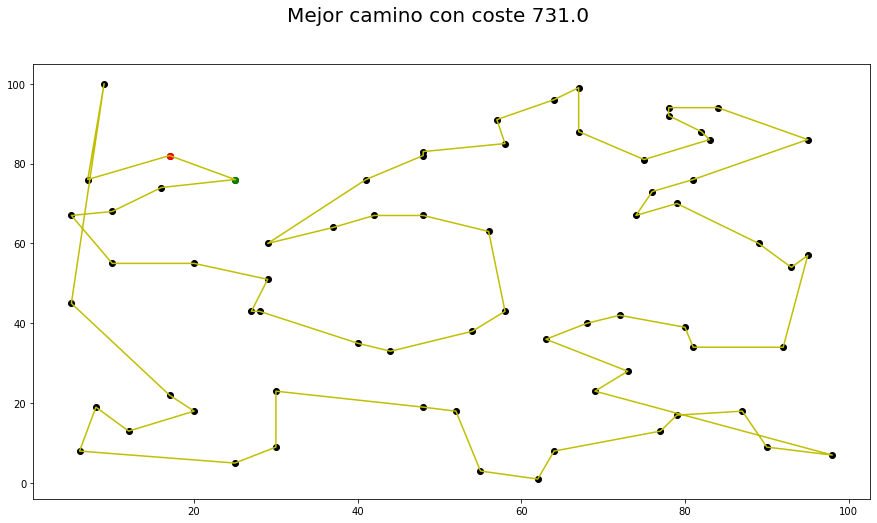

In [59]:
# Algoritmo SH
tam = len(x)
numSemillas = 5
numHormigas = 10
maxTime = 60 * 5

# Parámetro de la regla de transición
alpha = 1
beta = 2

# Parámetro de evaporación cada m hormigas
p = 0.1

resultado, km = greedy(x, y,"n")
feromonaInicial = 1 / ( tam * km)

t = inicializaTabla(feromonaInicial, resultado)

algoritmoSH( tam, numSemillas, numHormigas, maxTime, alpha, beta, p, t)

## SHE

In [60]:
def algoritmoSHE( tam, numSemillas, numHormigas, maxTime, alpha, beta, hormigasElitistas, p, t):
    analisisResultado = []
    mejorCam = []
    bestCost = float("inf")
    for z in range(0, numSemillas):
        resultadoIntermedio = []
        semilla = 50 * z
        random.seed(semilla)
        cMedia = []
        cMejor = []
        numEva = 0
        
        costeGlobal = float("inf")
        mejorHormiga = []

        tic()
        time = 0
        while time < maxTime:

            L = np.zeros((numHormigas, tam))

            # Nodo inicial aleatorio de cada hormiga
            for hormiga in range(0,numHormigas):   
                nodoInicial = random.randint(0,tam-1)
                L[hormiga, 0] = nodoInicial   

            # Solución de cada hormiga
            for hormigaActual in range(0,numHormigas):
                visitados = []
                visitados.append(L[hormigaActual, 0])
                noVisitados = list(range(0,tam))
                noVisitados.remove(L[hormigaActual, 0])
                while len(noVisitados) != 0:
                    nodoActual = int(visitados[-1])
                    costes = []
                    for i in noVisitados:
                        distancia = matrizDistancias[nodoActual, i]
                        feromona = t[nodoActual, i]
                        if feromona == 0:
                            feromona = 1.721170395869191e-05/10000
                        costes.append( (1 / ( distancia / feromona) ))

                    total = sum(costes)
                    for i in range(0, len(costes)):
                        if i != 0:
                            costes[i] = (100 * costes[i]) / total + costes[i-1]
                        else:
                            costes[i] = (100 * costes[i]) / total

                    # Me quedo con el que sea menor al random
                    dado = random.random() * 100
                    prob = 0
                    vecinoEncontrado = False
                    while prob < len(costes) and vecinoEncontrado == False:
                        if dado <= costes[prob]:
                            vecinoEncontrado = True
                        else:
                            prob += 1

                    visitados.append(noVisitados[prob])
                    noVisitados.remove(visitados[-1])

                L[hormigaActual] = visitados.copy()

            # Calculo coste de las soluciones
            coste = np.zeros((numHormigas))
            mejorCoste = float("inf")
            i = 0
            L = L.astype(int)
            for hormiga in range(0, numHormigas):
                numEva += 1
                coste[hormiga] = calculaCoste(L[hormiga].tolist())
                if coste[hormiga] < mejorCoste:
                    mejorCoste = coste[hormiga]
                    i = hormiga

            # Evaporación
            t = t * (1 - p)

            # Actualización de feromonas ( Aporte )
            for hormiga in range(0,numHormigas):
                aporte = 1 / coste[hormiga]
                if coste[hormiga] == mejorCoste:
                    t = actualizaTabla(t, aporte + hormigasElitistas * aporte, L[hormiga])
                else:
                    t = actualizaTabla(t, aporte, L[hormiga])

            # Comparo si es mejor que la global
            if mejorCoste < costeGlobal:
                costeGlobal = mejorCoste
                mejorHormiga = L[i]

            if costeGlobal < bestCost:
                bestCost = costeGlobal
                mejorCam = mejorHormiga.copy()
                
            time = toc()

        resultadoIntermedio.append(semilla)
        resultadoIntermedio.append(costeGlobal)
        resultadoIntermedio.append(numEva)
        resultadoIntermedio.append(time)
        analisisResultado.append(resultadoIntermedio)
    
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, bestCost)

<ipython-input-60-9ef7a555e7a4>:41: RuntimeWarning: overflow encountered in double_scalars
  costes.append( (1 / ( distancia / feromona) ))


,Semilla,Coste Minimo,Numero Evaluaciones,Tiempo
0,0.0,830.0,70820.0,300.012559
1,50.0,830.0,66510.0,300.019210
2,100.0,830.0,67940.0,300.052774
3,150.0,805.0,68240.0,300.033013
4,200.0,805.0,67500.0,300.003120


Media coste:  820.0
Desviación típica coste:  13.693063937629153
Media numero de evaluaciones:  68202.0
Desviación típica de evaluaciones:  1603.097002679501
Media tiempo:  300.02413535118103


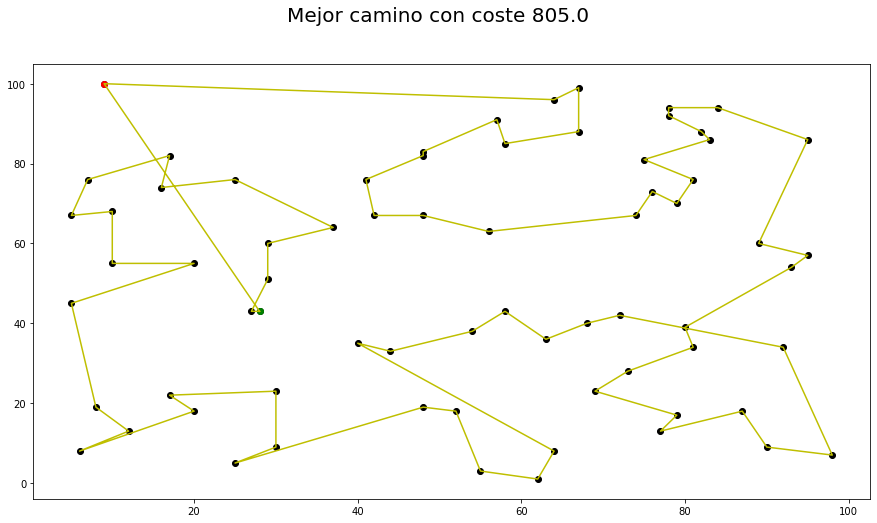

In [61]:
# Algoritmo SHE
tam = len(x)
numSemillas = 5
numHormigas = 10
maxTime = 60 * 5

# Parámetro de la regla de transición
alpha = 1
beta = 2

# Hormigas Elitistas
#hormigasElitistas = 15
hormigasElitistas = 3

# Parámetro de evaporación cada m hormigas
p = 0.1

resultado, km = greedy(x, y,"n")
feromonaInicial = 1 / ( tam * km)

t = inicializaTabla(feromonaInicial, resultado)

algoritmoSHE( tam, numSemillas, numHormigas, maxTime, alpha, beta, hormigasElitistas, p, t)

## SCH

In [62]:
def evaporacioLocal(t, actualizacionLocal, L):
    for i in range(0,len(L)):
        if (i + 1) == len(L):
            j = 0
        else:
            j = i + 1

        t[int(L[i]), int(L[j])] -= t[int(L[i]), int(L[j])] * actualizacionLocal
        t[int(L[j]), int(L[i])] -= t[int(L[j]), int(L[i])] * actualizacionLocal
    
    return t

In [63]:
def algoritmoSCH( tam, numSemillas, numHormigas, maxTime, alpha, beta, q0, p, actualizacionLocal, t):
    analisisResultado = []
    mejorCam = []
    bestCost = float("inf")
    for z in range(0, 5):
        resultadoIntermedio = []
        semilla = 50 * z
        random.seed(semilla)
        cMedia = []
        cMejor = []
        numEva = 0
        
        costeGlobal = float("inf")
        mejorHormiga = []

        tic()
        time = 0
        while time < maxTime:

            L = np.zeros((numHormigas, tam))

            # Nodo inicial aleatorio de cada hormiga
            for hormiga in range(0,numHormigas):   
                nodoInicial = random.randint(0,tam-1)
                L[hormiga, 0] = nodoInicial   

            # Solución de cada hormiga
            for hormigaActual in range(0,numHormigas):
                visitados = []
                visitados.append(L[hormigaActual, 0])
                noVisitados = list(range(0,tam))
                noVisitados.remove(L[hormigaActual, 0])
                while len(noVisitados) != 0:
                    
                    dadoSCH = random.random()
                    
                    if dadoSCH >= q0:
                        nodoAleatorio = random.choice(noVisitados)
                        visitados.append(nodoAleatorio)
                        noVisitados.remove(visitados[-1])
                    else:                    
                        nodoActual = int(visitados[-1])
                        costeMin = float("inf")
                        nodo = noVisitados[0]
                        for it in range(0,len(noVisitados)):
                            i = noVisitados[it]
                            distancia = matrizDistancias[nodoActual, i]
                            feromona = t[nodoActual, i]
                            if feromona == 0:
                                feromona = 1.721170395869191e-05/10000
                            costes = (distancia / feromona) 
                            if costes < costeMin:
                                costeMin = costes
                                nodo = i

                        visitados.append(nodo)
                        if nodo not in noVisitados:
                            print(nodo)
                            print(noVisitados)
                        noVisitados.remove(visitados[-1])

                L[hormigaActual] = visitados.copy()
                evaporacioLocal(t, actualizacionLocal,  L[hormigaActual])
                    
            # Calculo coste de las soluciones
            coste = np.zeros((numHormigas))
            mejorCoste = float("inf")
            i = 0
            L = L.astype(int)
            for hormiga in range(0, numHormigas):
                numEva += 1
                coste[hormiga] = calculaCoste(L[hormiga].tolist())
                if coste[hormiga] < mejorCoste:
                    mejorCoste = coste[hormiga]
                    i = hormiga

            # Evaporación
            t = t * (1 - p)

            # Actualización de feromonas ( Aporte )
            aporte = 1 / coste[i]
            t = actualizaTabla(t, aporte, L[i])

            # Comparo si es mejor que la global
            if mejorCoste < costeGlobal:
                costeGlobal = mejorCoste
                mejorHormiga = L[i]
            
            if costeGlobal < bestCost:
                bestCost = costeGlobal
                mejorCam = mejorHormiga.copy()

            time = toc()

        resultadoIntermedio.append(semilla)
        resultadoIntermedio.append(costeGlobal)
        resultadoIntermedio.append(numEva)
        resultadoIntermedio.append(time)
        analisisResultado.append(resultadoIntermedio)
    
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, bestCost)

<ipython-input-63-b98b9b0b9a61>:51: RuntimeWarning: overflow encountered in double_scalars
  costes = (distancia / feromona)


,Semilla,Coste Minimo,Numero Evaluaciones,Tiempo
0,0.0,727.0,125650.0,300.010210
1,50.0,693.0,107950.0,300.009432
2,100.0,735.0,101710.0,300.028741
3,150.0,723.0,97470.0,300.006661
4,200.0,728.0,80820.0,300.010167


Media coste:  721.2
Desviación típica coste:  16.346253393362037
Media numero de evaluaciones:  102720.0
Desviación típica de evaluaciones:  16289.033120477103
Media tiempo:  300.013041973114


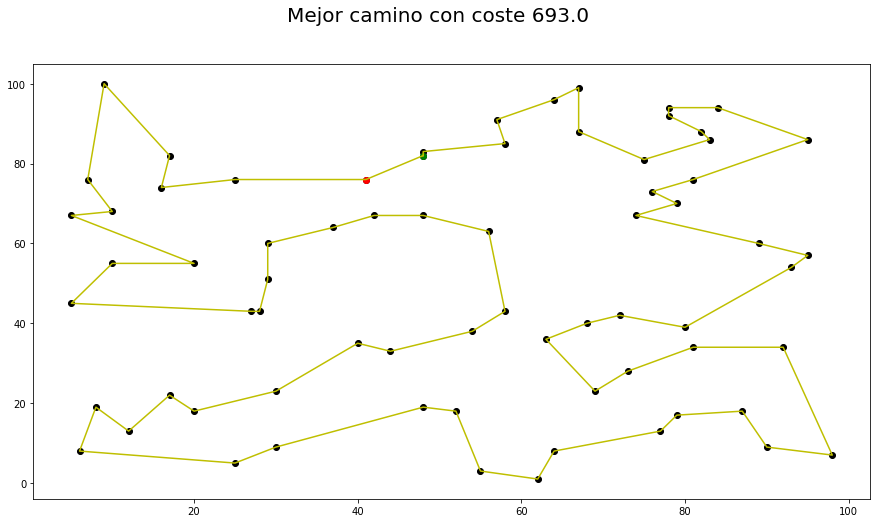

In [64]:
# Algoritmo SCH
tam = len(x)
numSemillas = 5
numHormigas = 10
maxTime = 60 * 5

# Parámetro de la regla de transición
alpha = 1
beta = 2
q0 = 0.98

# Parámetro de evaporación cada m hormigas
p = 0.1

actualizacionLocal = 0.1

resultado, km = greedy(x, y,"n")
feromonaInicial = 1 / ( tam * km)

t = inicializaTabla(feromonaInicial, resultado)

algoritmoSCH( tam, numSemillas, numHormigas, maxTime, alpha, beta, q0, p, actualizacionLocal, t)